Machine learning has 2 types(supervised & Unsupervised) of learning:
1. Supervised Learning: In this type of learning, we already train our modek with the pre existing data that we have and then use algorithm to predict the required result. It is further classified into 2 types:

        1. Classification - It is when we have to classify the predicted output into multiple classes or binary classes depending upon where it needs to be classified into.
        
        2. Regression - It is when our output in itself is a continuos range, that is we are supposed to predict the exact value of our output rather than the category, such a model or algorithm which can do this is called regression.

2. Unsupervised learning: Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision.
it means we don't educate the machine. it learns itself by finding relations and patterns
it is further classified into 2 types:

        1. Clustering
        
        2.Association

Steps for Supervised learning:
1. Data Finding -  refers to finding the required data by data manipulation of the data set.
2. Data Loading and Cleaning - For cases when data is being acquired from multiple places, the data might be inconsistent, therefore it is essential for us to clean the data or simply make it consistent for usage. It also refers to turn the useful string items into integers so they can be used. Can also mean to manipulate NaN data.(to drop or to fill with the best approximation.)
3. Train the Algorithm 
4. Test the Algorithm

### Always follow the 80-20 rule while solving an ML problem that is keep 80% of the data for training and test the algorithm with the remaining 20% so that it may not remember the past values or overfit.

Supervised Learning > classification| is further divided into different algo
starting from 1st KNN

In [1]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

Learning to Apply KNN over Flower Type data set. KNN stands for K nearest Neighbours.

KNN can be summarized as below:

--Computes the distance between the new data point with every training example.

--For computing the distance measures such as Euclidean distance, Hamming distance or Manhattan distance will be used.

--Model picks K entries in the database which are closest to the new data point.

--Then it does the majority vote i.e the most common class/label among those K entries will be the class of the new data point.

So , Importing the data from a csv file and wokring on it

In [2]:
df=pn.read_csv('iris.data')

In [3]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.columns=['SL','SW','PL','PW','Flower']

In [5]:
df.head()

,SL,SW,PL,PW,Flower
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
x=df.drop('Flower',axis=1)

In [7]:
x

,SL,SW,PL,PW
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [8]:
y=df['Flower']
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Flower, Length: 149, dtype: object


In [9]:
#y=pn.get_dummies(y)
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Flower, Length: 149, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [11]:
print(x_train.shape)
print(y_train.shape)

(119, 4)
(119,)


In [12]:
print(x_test.shape)
print(y_test.shape)
print()
print()

(30, 4)
(30,)




Importing the KNN Classifier Class from sklearn

In [13]:
from sklearn.neighbors import KNeighborsClassifier

Importing Metric Models to check Accuracy

In [14]:
from sklearn import metrics

Try Running from k=1 through 25 and recording the testing accuracy

In [15]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

plotting the accuracy of our model, using matplotlib library.
the graph would be between the different values of k and the scores list of metrics.

Text(0, 0.5, 'Testing Accuraccy')

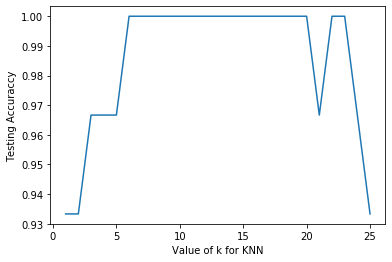

In [16]:
%matplotlib inline

plt.plot(k_range,scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuraccy')

Larger K value leads to smoother decision boundary (less complex model)

whereas smaller k leads to more complex model (may lead to ovefitting) or not complex enough(underfit)

so through graph we saw maximum efficiency is at k 15 to 20, so fixing K as 16 and predicting values for the different inputs

In [17]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [31]:
#0=setosa 1=versicolor 2= virginica
classes={0:'setosa',1:'versicolor',2:'virginica'}

#making predicition on some unseen data
#predict for the below two random observations
x_new=[[3,4,5,2],[5,4,2,2]]
y_predict=knn.predict(x_new)

In [33]:
print(y_predict[0])


Iris-versicolor
